# Sendy Explore Competition

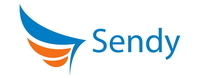

1 Introduction

2 Body

  2.1 Import modules

  2.2 Import dataset

  2.3 EDA

  2.4 Modelling

  2.5 Model selection

  2.6 Analysis

3 Conclusion


 

<a id="intro"></a>
##  Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised statistical learning method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

The Zindi challenge, hosted by Sendy in partnership with insight2impact facility, is to build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package. An accurate arrival time will enhance customer communication and customer experience. In addition, the solution will help businesses reduce the cost of trade through better management of resources and planning.  

### Problem Statement
Build a regression model that will predict an accurate time of arrival for motobike deliveries from the pickup point to the destination of the package.

### Datasets and Variables  

The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders, from pick-up to drop-off. The training dataset is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi. 

**train_data:** The dataset that will be used to train our model  
**test_data:** The dataset to which we will apply our model  
**riders:** Contains unique rider IDs, number of orders, age, rating and number of ratings

**Order details**  
* Order No: Unique number identifying the order  
* User Id: Unique number identifying the customer on a platform  
* Vehicle Type: For this competition limited to bikes, however in practice, Sendy service extends to trucks and vans  
* Platform Type: Platform used to place the order (there are 4 types)  
* Personal or Business: Customer type  

**Placement times**  
* Placement: Day of Month (i.e 1-31)  
* Placement: Weekday (Monday = 1)  
* Placement: Time - Time of day the order was placed  

**Confirmation times**  
* Confirmation: Day of Month (i.e 1-31)  
* Confirmation: Weekday (Monday = 1)  
* Confirmation: Time (Time of day the order was confirmed by a rider)  

**Arrival at Pickup times**  
* Arrival at Pickup: Day of Month (i.e 1-31)  
* Arrival at Pickup: Weekday (Monday = 1)  
* Arrival at Pickup: Time (Time of day the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application)  

**Pickup times**  
* Pickup: Day of Month (i.e 1-31)  
* Pickup: Weekday (Monday = 1)  
* Pickup: Time (Time of day the rider picked up the order - as marked by the rider through the Sendy application)  

**Arrival at Destination times** (not in Test set)  
* Arrival at Destination: Day of Month (i.e 1-31)  
* Arrival at Destination: Weekday (Monday = 1)  
* Arrival at Destination: Time (Time of day the rider arrived at the destination to deliver the order - as marked by the rider through the Sendy application)  
* Distance covered (KM): The distance from Pickup to Destination  
* Temperature: Temperature at the time of order placement in Degrees Celsius (measured every three hours)  
* Precipitation in Millimeters: Precipitation at the time of order placement (measured every three hours)  
* Pickup Latitude and Longitude: Latitude and longitude of pick up location  
* Destination Latitude and Longitude: Latitude and longitude of delivery location  
* Rider ID: ID of the Rider who accepted the order  
* Time from Pickup to Arrival: Time in seconds between ‘Pickup’ and ‘Arrival at Destination’ **(Target variable)**    

**Rider metrics**  
* Rider ID: Unique number identifying the rider (same as in order details)  
* No of Orders: Number of Orders the rider has delivered  
* Age: Number of days since the rider delivered the first order  
* Average Rating: Average rating of the rider  
* No of Ratings: Number of ratings the rider has received. Rating an order is optional for the customer

 # Body

## 2.1 Import modules

In [2]:
#import modules 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import math

from datetime import datetime

## 2.2 Import dataset

In [3]:
from google.colab import files
df = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv
Saving Riders.csv to Riders.csv
Saving Train.csv to Train.csv
Saving Test.csv to Test.csv


In [5]:
#run this cell only if using google colab
train_df = pd.read_csv('Train.csv') #training set
test_df = pd.read_csv('Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('Riders.csv') #riders info
sample = pd.read_csv('SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

# 2.3 Exploratory Data Analysis (EDA)

### Lets Look at data


### Riders EDA

In [6]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [7]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [8]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [9]:
# looking for nulls per column
riders.isnull().sum(axis=0)

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

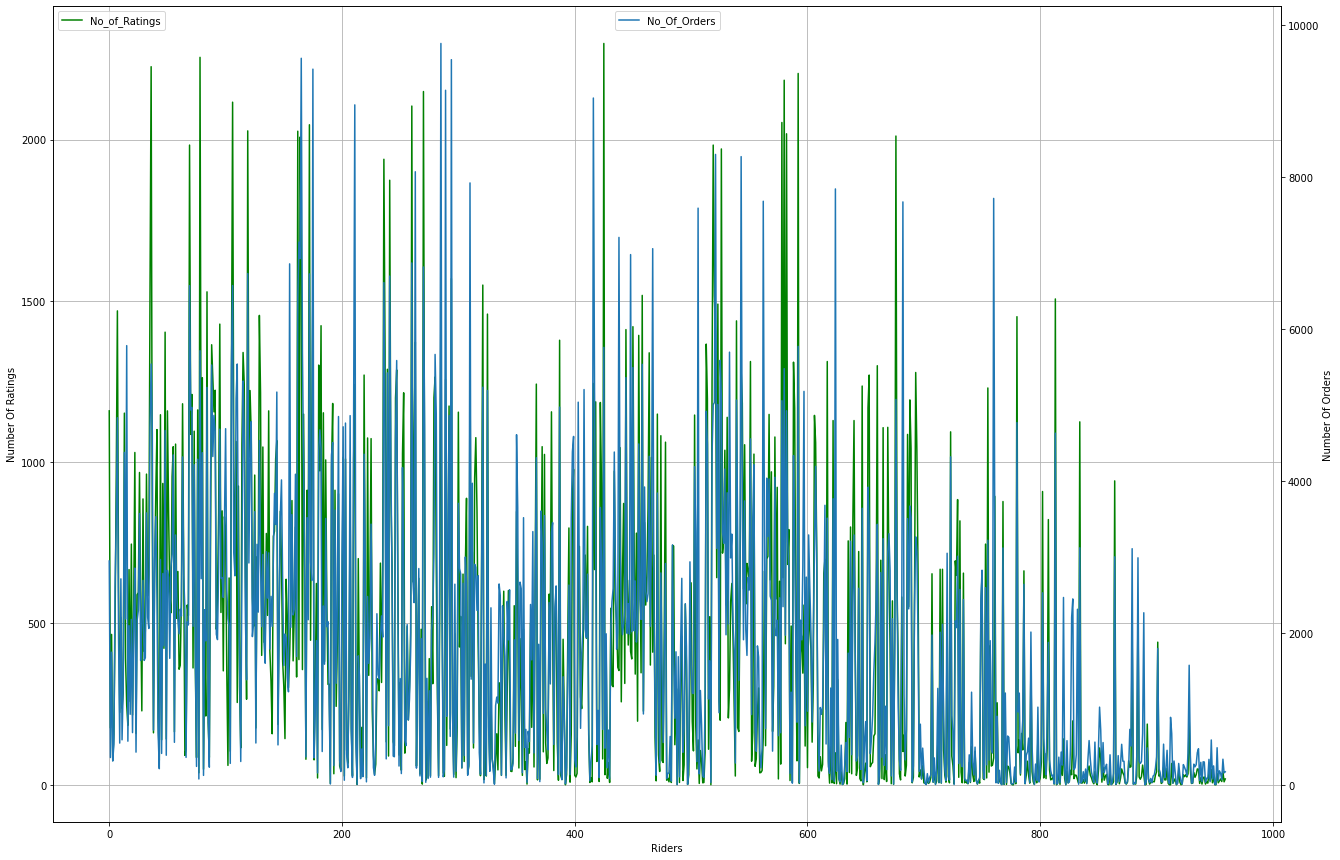

In [10]:
# Riders Number Of Ratings Vs Number Of Orders
from matplotlib import rc

rc('mathtext', default='regular')
# Create Empty figure
build = plt.figure(figsize=(22,15))

# Split Figure To Allow Two Sets Of Y Axes
axes1 = build.add_subplot(111)

# Plot The First Line On Its Axis
axes1.plot(np.arange(len(riders["No_of_Ratings"])), riders["No_of_Ratings"], '-', label = "No_of_Ratings", color='green')

# Create Second Y Axis And Plot Second Line
axes2 = axes1.twinx()
axes2.plot(np.arange(len(riders["No_Of_Orders"])), riders["No_Of_Orders"], '-', label = "No_Of_Orders")

# Add Legends For Each Axis
axes1.legend(loc=2)
axes2.legend(loc=9)

axes1.grid()

# Set Labels Of Axes
axes1.set_xlabel("Riders")
axes1.set_ylabel("Number Of Ratings")
axes2.set_ylabel("Number Of Orders")
plt.show()

## Train EDA

In [11]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In train, the categorical variables are Vehicle type(although there is only one- bike), Platform type and Personal or Business, refering to the business type. Temperature is a ratio variable. In this data, day is considered to be a categorical variable, however, it should be represented as a cyclical variable

In [13]:
print('train contains')
print('No. of rows:', train_df.shape[0])
print('No. of columns:', train_df.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [14]:
train_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [16]:
train_df.isnull().sum(axis = 0) #number of nulls per column

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

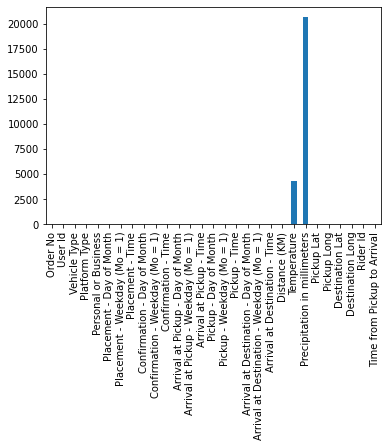

In [18]:
# Bar chart showing the number of missing values in each column
train_df.isnull().sum().plot(kind='bar')

In [19]:
def percentage_missing_values(input_df, column_name):

  missing_col_values = sum(input_df[column_name].isnull())

  per_col_missing = round(missing_col_values / len(input_df[column_name]) * 100, 2)

  return print(column_name, ":" ,per_col_missing, "percentage of the data is missing")

In [21]:
percentage_missing_values(train_df, "Temperature")

Temperature : 20.59 percentage of the data is missing


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



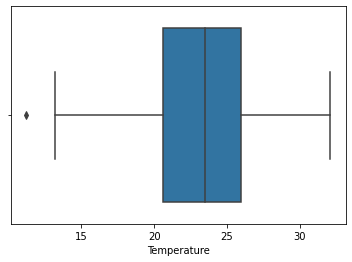

In [23]:
#understanding temperature data
sns.boxplot(train_df['Temperature'])
plt.show()


20.59% of 'Temperature' data is missing. This will need to be imputed either with the mean, mode or median. The mean is 23.25° while the median is 23.5°

In [25]:
percentage_missing_values(train_df, "Precipitation in millimeters")

Precipitation in millimeters : 97.4 percentage of the data is missing


Then precipitation column will need to be dropped



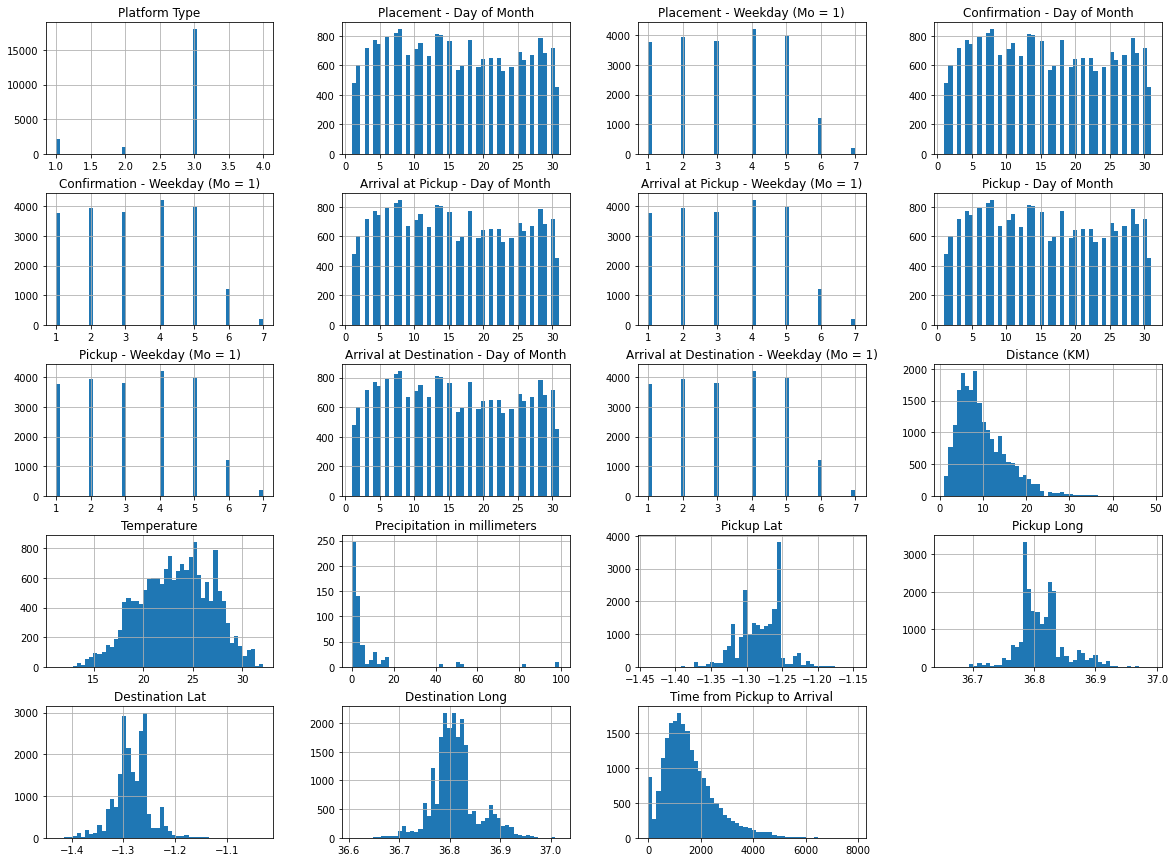

In [27]:
#plotting distributions of all the variables in train
train_df.hist(bins=50, figsize=(20,15), color = 'tab:blue')
plt.show()


The figure above shows us the distribution of each of the variables in train, inclduing the y variable(Time from pickup to arrival). Looking at the mean and mode of each of the variables, it was assumed that the data was normally distributed. However, it can be seen that the data is skewed for variables such as Distance.

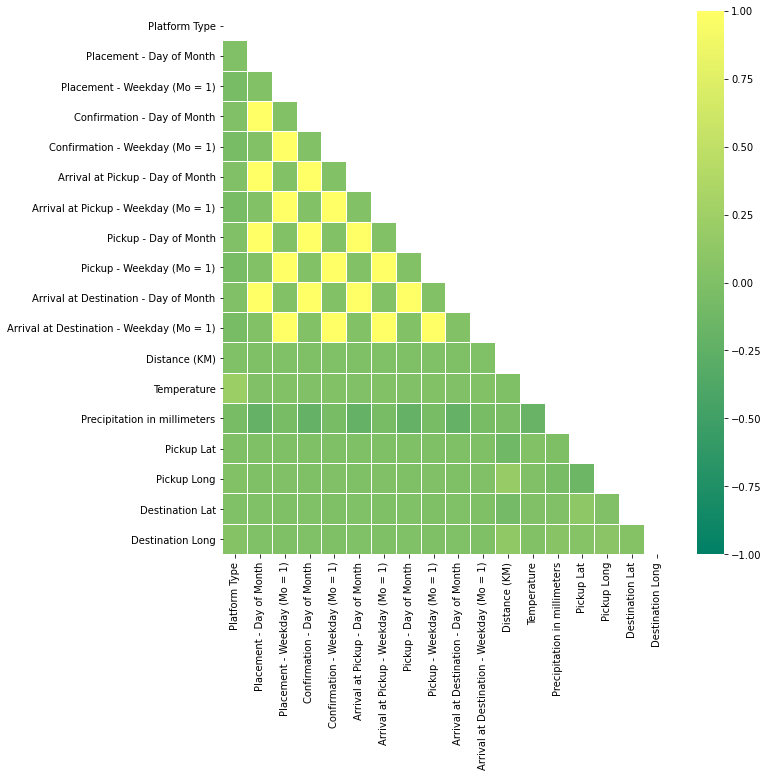

In [28]:
#Plotting correlation heat map for predictor variable in train 
train_variables = train_df.drop(['Time from Pickup to Arrival'], axis =1)
train_kor = train_variables.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_kor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the matrix
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='summer', linewidth=0.1, mask = mask);

In [30]:
#visualising pick-up locations on a street map 
px.scatter_mapbox(train_df, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'Blues', 
                     mapbox_style = 'open-street-map',
                     title = 'Pick-up location')

## Test data

In [31]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [32]:
print('test contains')
print('No. of observations:', test_df.shape[0])
print('No. of features:', test_df.shape[1])

test contains
No. of observations: 7068
No. of features: 25


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [33]:
# List columns not present in the test dataset
set(train_df.columns) - set(test_df.columns)

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

We must drop the above before moving on

In [34]:
# List columns not present in the train dataset just to be sure
set(test_df.columns)-set(train_df)

set()

In [35]:
placement = [col for col in train_df.columns if ((col[:len('Placement')] == 'Placement') or (col[:len('Confirmation')] == 'Confirmation')) ]
placement

['Placement - Day of Month',
 'Placement - Weekday (Mo = 1)',
 'Placement - Time',
 'Confirmation - Day of Month',
 'Confirmation - Weekday (Mo = 1)',
 'Confirmation - Time']

The placement time of the order is irrelevant to the target. The main concern of the problem statement is the period between pickup and arrival. When the order was placed, has no bearing whatsoever in effect to that period. So, we are going to drop everything concerning placement.

Furthermore, 'Confirmation' columns, with the same argument, must be dropped

# 2.4 Data Preprocessing

In [43]:
xdata = train_df.drop(columns=['Time from Pickup to Arrival', 'User Id', 'Order No', 
'Arrival at Destination - Day of Month',
'Arrival at Destination - Time',
'Arrival at Destination - Weekday (Mo = 1)'] + placement)

# "Arrival at Destination", that's what we trying to predict - We have 'Time from Pickup to Arrival' 

X = xdata.copy() # Just for insurance so that whatever changes we make, do not affect the original data
X = X.merge(riders, how='left', on=['Rider Id']).drop(columns=['Rider Id'])

f_testx = test_df.merge(riders, how='left', on=['Rider Id']).drop(columns=['User Id', 'Order No', 'Rider Id'] + placement)

# We just want to keep essential columns

In [61]:
#target variable
y = train_df['Time from Pickup to Arrival'] 



In [44]:
#Let's confirm if columns on train are those on test
set(f_testx.columns) == set(X.columns)

True

In [45]:

### START FUNCTION
def cleaner(input_df, nullthreshold=0.9, correlation_thresh=0.95, day_of_month_cols=[], day_of_week_cols=[]):
    input_dfc = input_df.copy()
    

    #########################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    for col in input_df.columns:
        if (sum(input_df[col].isnull())/len(input_df[col]) > nullthreshold) or (len(input_df[col].unique()) == 1):
            input_dfc.drop(columns=[col], inplace=True) 
            
    #########################################################################################

    #########################################################################################
    #   This code converts time given by am and pm into seconds then applies cosine and sine
    #   This is done because hours and days of the week, and days of the month are cyclic.
    #   That is, for example, if 1 represents Monday, as in our data, the model must understand that, 
    #   Day 7, that is Sunday, is closer to day 1, than day 3 is, which is Wednesday. 
    def time_to_seconds(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            # Here, we convert the time to seconds, from 00:00am instead of seperating the data into
            # hours, minutes and seconds or dropping either one of them because we may lose data. 
            # This is essential because there are deliveries made in seconds. 

            # The sine and cosine functions are of the form: sin(seconds*2*pi/86400), cosine likewise.
            # Just as the complete circle revolution period is 2*pi, the period of a day in seconds is 86400

            input_dfc[time_col + '_sin(seconds)'] = \
            input_df[time_col].apply(lambda time: np.sin(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) )) # there are 86400 seconds in a day

            input_dfc[time_col + '_cos(seconds)'] = \
            input_df[time_col].apply(lambda time: np.cos(
                (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds() \
                * (2.*np.pi/86400) ))

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc

    input_dfc2 = time_to_seconds(input_dfc)
    #########################################################################################
    
    #########################################################################################
    # This code encodes ['Platform Type', 'Personal or Business']
    
    def one_encoder(input_df, columns):
    
        return pd.get_dummies(input_df, drop_first=True, columns=columns, dtype=float)

    
    input_dfc2 = one_encoder(input_dfc2, ['Platform Type', 'Personal or Business'])
    #########################################################################################
    # Refer to time_to_seconds function: Pretty much same logic
    def cyclic_days(input_df, month_days_cols, weekdays_cols):
        input_dfc = input_df.copy()


        for mday_col in month_days_cols:
            if mday_col in input_dfc.columns:

                input_dfc[mday_col + '_sin(day)'] = input_df[mday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/31))\
                    )

                input_dfc[mday_col + '_cos(day)'] = input_df[mday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/31))\
                    )

                input_dfc.drop(mday_col, inplace=True, axis=1)


        for wday_col in weekdays_cols:
            if wday_col in input_dfc.columns:

                input_dfc[wday_col + '_sin(day)'] = input_df[wday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/7))\
                    )

                input_dfc[wday_col + '_cos(day)'] = input_df[wday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/7))\
                    )

                input_dfc.drop(wday_col, inplace=True, axis=1)
            else:
                continue

        return input_dfc
    
    input_dfc2 = cyclic_days(input_dfc2, day_of_month_cols, day_of_week_cols)     
    #########################################################################################
    # This code will remove one of a pair of variables that are 95% correlated
    def correlation_drop(df, thresh):
        while True:
            corr_matrix = df.corr(method = "spearman").abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
            to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
            if len(to_drop) == 0:
                break
            else:
                df = df.drop(to_drop, axis = 1)
            
        return df
    
    input_dfc2 = correlation_drop(input_dfc2, correlation_thresh)
    #########################################################################################

    print(f"Total of {len([x for x in input_df.columns if x not in input_dfc2])} original columns dropped \n")  
    print(f"Total of {len([x for x in input_dfc2.columns if x not in input_df])} new CLEAN columns formed \n")
    print(f"Dataframe now has {len(input_dfc2.columns)} from {len(input_df.columns)} input columns")
    #print([x for x in input_df.columns if x not in input_dfc2])

    return input_dfc2

### END FUNCTION

In [46]:
#we doing this when we want to create a cross validation mode
day_of_month_cols = [x for x in X.columns if x[-5:] == 'Month'] 
day_of_week_cols = [x for x in X.columns if x[-(len('(Mo = 1)')):] == '(Mo = 1)']

X1 = cleaner(X, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols) 

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [47]:
# Applying cleaner to final test as well: This works because there are many observations.
F_test = cleaner(f_testx, day_of_month_cols=day_of_month_cols, day_of_week_cols=day_of_week_cols)

Total of 10 original columns dropped 

Total of 10 new CLEAN columns formed 

Dataframe now has 20 from 20 input columns


In [48]:
X1.head(4)

,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Arrival at Pickup - Time_sin(seconds),Arrival at Pickup - Time_cos(seconds),Platform Type_2,Platform Type_3,Platform Type_4,Personal or Business_Personal,Arrival at Pickup - Day of Month_sin(day),Arrival at Pickup - Day of Month_cos(day),Arrival at Pickup - Weekday (Mo = 1)_sin(day),Arrival at Pickup - Weekday (Mo = 1)_cos(day)
0,4,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,0.481817,-0.876272,0.0,1.0,0.0,0.0,0.968077,-0.250653,-0.974928,-0.222521
1,16,26.4,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69,0.085562,-0.996333,0.0,1.0,0.0,1.0,0.651372,-0.758758,-0.974928,-0.222521
2,3,NaN,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,114,-0.214593,-0.976703,0.0,1.0,0.0,0.0,-0.201299,0.979530,0.974928,-0.222521
3,9,19.2,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,113,0.580940,-0.813947,0.0,1.0,0.0,0.0,0.101168,-0.994869,-0.974928,-0.222521


In [49]:
set(X1.columns) == set(F_test.columns) # Just to confirm

True

# 2.5 Modelling

In [50]:
# This is not necessary because we are going to do a cross validation.
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

# 2.6 Model Selection

### rmse score 





In [ ]:
!pip install catboost

In [ ]:
from sklearn.pipeline           import Pipeline
from sklearn.impute             import SimpleImputer
from sklearn.preprocessing      import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.compose            import ColumnTransformer
from sklearn.metrics            import mean_squared_error
from sklearn.model_selection    import KFold, cross_val_score
from xgboost.sklearn            import XGBRegressor
from lightgbm                   import LGBMRegressor
from catboost                   import CatBoostRegressor


polinomial_features = PolynomialFeatures(1) # This is polynomial order of the variable incase of polynomial regression
# Linear models always improved with order 2; but other models got worse. 
# Other models were better than the best of Linear models in order 1. Hence it is currently in order


models = [Lasso(), RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor(), CatBoostRegressor(verbose=0)]
# We have chosen the models that improve the score from the LinearRegression model.

# This is going to take forever if one were to rerun it. 

for mod in models:
    estimators = []
    estimators.append(('imputer', SimpleImputer(strategy='median')))
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('plf', polinomial_features))
    estimators.append(('mod', mod))
    model = Pipeline(estimators)

    # We'll use all the features of the clean data, X1, and the target y

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold" are mutually orthogonal.


    
    kfold = KFold(n_splits=5)

    results = cross_val_score(model, X1, y, cv=kfold, scoring='neg_mean_squared_error')
    print(mod)
    print ('CV Scoring Result: mean=',np.sqrt(abs(np.mean(results))),'std =', np.std(sorted(np.sqrt(-np.array(results)))),
    '\nlist of RMSE values =', sorted(np.sqrt(-np.array(results))))
    print('\n')

#### Analysis


We trained **6 different regression models** and discovered that CatBoostRegressor returned the highest score, with a value of 720.82.


**RMSE was used to select the best model**
CatBoostRegressor provided the best RMSE score of 720.82
We found that temperature had no effect on the delivery time

# 2.7 using model on tests

In [53]:
estimators2 = []
polinomial_features = PolynomialFeatures(1)
estimators2.append(('imputer', SimpleImputer(strategy='median')))
estimators2.append(('standardize', StandardScaler()))
estimators2.append(('plf', polinomial_features))
estimators2.append(('mod', CatBoostRegressor(verbose=0)))
model = Pipeline(estimators2)

In [54]:
model.fit(X1, y)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('plf',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('mod',
                 <catboost.core.CatBoostRegressor object at 0x7fa543d29390>)],
         verbose=False)

In [55]:
y_pred = model.predict(F_test)

In [57]:
#To upload to Zindi

sample_df2 = sample.copy()
sample_df2['Order_No'] = test_df['Order No']
sample_df2['Time from Pickup to Arrival'] = y_pred
sample_df2.to_csv('catboost.csv', index=False)

In [58]:
my_predicted_time= pd.read_csv('catboost.csv')
my_predicted_time.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1607.170421
1,Order_No_12736,1483.013327
2,Order_No_768,1453.011595
3,Order_No_15332,1185.553202
4,Order_No_21373,1175.846067


In [59]:
#only if working in google colab:
files.download("catboost.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3 Conclusion


After testing 6 different models, CatBoostRegressor proved to be the most effective at accurately predicting delivery time.